# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Load the Data

In [159]:
df = pd.read_csv("C:\\Users\\abo_O\\OneDrive\\سطح المكتب\\Tuwaiq Academy\\Tuwaiq_Academy_T5_Week_4\\1-Weekly Task\\Datasets\\Traffic_Accidents.csv")
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [160]:
df.dtypes

Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                              float64
Number_of_Vehicles                               int64
Number_of_Casualties                           float64
Date                                            object
Day_of_Week                                      int64
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
2nd_Road_Class                                   int64
2nd_Road_Number                                  int64
Pedestrian

In [161]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [162]:
df.shape

(52000, 26)

In [163]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [164]:
df['Day_of_Week'].unique()

array([6, 1, 4, 7, 3, 5, 2], dtype=int64)

In [165]:
df.groupby('Day_of_Week').agg({'Number_of_Vehicles' : ['max', 'min', 'sum', 'mean']})

Number_of_Vehicles                     
                           max min    sum      mean
Day_of_Week                                        
1                           10   1  10121  1.795459
2                            7   1  13724  1.844624
3                           11   1  14299  1.851722
4                           10   1  13991  1.853113
5                           12   1  14794  1.853652
6                           34   1  15966  1.839189
7                            8   1  12490  1.787094

In [166]:
df.groupby('Accident_Severity').agg({'Number_of_Vehicles' : ['max', 'min', 'sum', 'mean'], 'Year': ['mean']})

Number_of_Vehicles                              Year
                                 max min    sum      mean         mean
Accident_Severity                                                     
1.0                               34   1   1186  1.783459  2008.915789
2.0                                8   1  11863  1.674146  2009.560401
3.0                               12   1  81730  1.860587  2009.384137

In [167]:
df.isna().sum()

Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                               322
Number_of_Vehicles                                0
Number_of_Casualties                           1041
Date                                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
2nd_Road_Class                                    0
2nd_Road_Number                                   0
Pedestrian_Crossing-Human_Control                 0
Pedestrian_C

In [168]:
df['Number_of_Casualties'].unique()

array([ 1.,  2.,  3., nan,  4.,  9.,  7.,  8.,  5.,  6., 42., 14., 12.,
       10., 13., 24., 51., 18., 11., 23.])

In [169]:
df['Light_Conditions'].unique()

array(['Darkeness: No street lighting',
       'Darkness: Street lights present and lit',
       'Daylight: Street light present', nan,
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit'], dtype=object)

In [170]:
df.dropna(axis=0, inplace=True)
df.shape

(50029, 26)

In [171]:
df.duplicated().sum()

43

In [172]:
df.drop_duplicates(inplace=True)
df.shape

(49986, 26)

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [173]:
df.dtypes

Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                              float64
Number_of_Vehicles                               int64
Number_of_Casualties                           float64
Date                                            object
Day_of_Week                                      int64
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
2nd_Road_Class                                   int64
2nd_Road_Number                                  int64
Pedestrian

In [174]:
df['Location'] = df['Location_Easting_OSGR'] + df['Location_Northing_OSGR']
df['Location'].unique

<bound method Series.unique of 0        664480.0
1        696030.0
2        483590.0
3        750030.0
4        736578.0
           ...   
51995    794505.0
51996    583740.0
51997    692760.0
51998    768720.0
51999    640140.0
Name: Location, Length: 49986, dtype: float64>

In [175]:
num_col = df.select_dtypes('int64', 'float')
cat_col = df.select_dtypes('object')
num_col.dtypes, cat_col.dtypes

(Police_Force                  int64
 Number_of_Vehicles            int64
 Day_of_Week                   int64
 Local_Authority_(District)    int64
 1st_Road_Class                int64
 1st_Road_Number               int64
 Speed_limit                   int64
 2nd_Road_Class                int64
 2nd_Road_Number               int64
 Year                          int64
 dtype: object,
 Date                                           object
 Local_Authority_(Highway)                      object
 Road_Type                                      object
 Pedestrian_Crossing-Human_Control              object
 Pedestrian_Crossing-Physical_Facilities        object
 Light_Conditions                               object
 Weather_Conditions                             object
 Road_Surface_Conditions                        object
 Did_Police_Officer_Attend_Scene_of_Accident    object
 dtype: object)

In [176]:
le = LabelEncoder()

edf = df.copy()

for col in df:
    edf[col] = le.fit_transform(edf[col])

edf.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Location
0,26999,1948,45167,2199,32,2,0,0,2901,5,...,1,2,2,0,4,1,1,1,3,8890
1,22310,8464,33467,16650,0,2,1,0,1057,0,...,1,2,2,2,1,0,0,1,4,11488
2,4175,6415,5108,9246,41,2,1,0,1476,3,...,1713,2,2,4,1,0,0,1,0,2327
3,6214,22848,8155,38074,2,2,0,1,1901,6,...,1,2,2,4,5,5,0,1,2,16885
4,10207,18409,14149,31641,14,2,1,1,610,2,...,1,2,2,4,1,0,0,1,7,15734


In [177]:
edf.dtypes

Location_Easting_OSGR                          int64
Location_Northing_OSGR                         int64
Longitude                                      int64
Latitude                                       int64
Police_Force                                   int64
Accident_Severity                              int64
Number_of_Vehicles                             int64
Number_of_Casualties                           int64
Date                                           int32
Day_of_Week                                    int64
Local_Authority_(District)                     int64
Local_Authority_(Highway)                      int32
1st_Road_Class                                 int64
1st_Road_Number                                int64
Road_Type                                      int32
Speed_limit                                    int64
2nd_Road_Class                                 int64
2nd_Road_Number                                int64
Pedestrian_Crossing-Human_Control             

In [178]:
df.shape

(49986, 27)

In [179]:
scaler = StandardScaler()
df.head()
sdf = edf.copy()

In [180]:
scaler.fit_transform(sdf)

array([[ 1.33677699, -1.44854068,  1.45872863, ...,  0.48355577,
        -0.29884003, -0.84814951],
       [ 0.77018243, -0.69758251,  0.63065702, ...,  0.48355577,
         0.08688099, -0.54363579],
       [-1.42115738, -0.93372635, -1.37646118, ...,  0.48355577,
        -1.45600309, -1.61740416],
       ...,
       [ 1.17074992, -1.11420525,  1.29134492, ...,  0.48355577,
         0.472602  , -0.58278421],
       [-0.07094889,  0.325016  , -0.10738835, ...,  0.48355577,
         0.472602  ,  0.2672287 ],
       [ 0.21567135, -0.72120842,  0.15844387, ...,  0.48355577,
         0.08688099, -1.01130698]])

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [181]:
X = sdf.drop(columns=['Location'])
y = sdf['Location']

X.shape, y.shape

((49986, 26), (49986,))

In [182]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold= 0.7)
sel.fit_transform(X)


array([[26999,  1948, 45167, ...,     4,     1,     3],
       [22310,  8464, 33467, ...,     1,     0,     4],
       [ 4175,  6415,  5108, ...,     1,     0,     0],
       ...,
       [25625,  4849, 42802, ...,     5,     5,     5],
       [15349, 17337, 23039, ...,     5,     5,     5],
       [17721,  8259, 26795, ...,     1,     0,     4]], dtype=int64)

In [183]:
sel.get_feature_names_out()

array(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Year'],
      dtype=object)

In [184]:
X.shape

(49986, 26)

In [185]:
X.drop(columns=['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties','Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident'], axis=1, inplace=True)

In [186]:
X.shape

(49986, 19)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [188]:
from  sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_


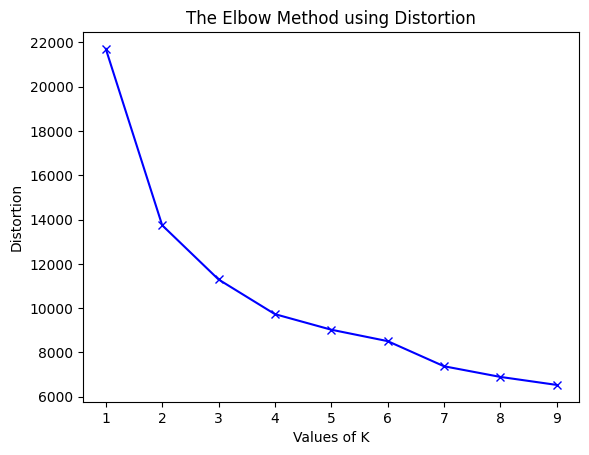

In [189]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [190]:
KModel = KMeans(n_clusters=3, random_state=42)
KModel.fit(X)
KModel.labels_

array([1, 1, 0, ..., 1, 2, 1])

## Plot the data points with their predicted cluster center

ValueError: x and y must be the same size

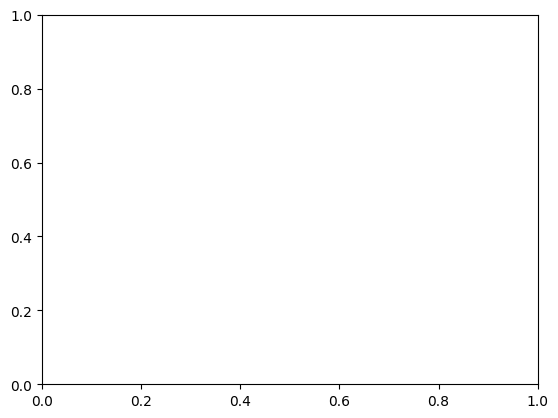

In [193]:
plt.scatter(X, y, c=KModel.labels_)
#plt.legend(scatter.legend_elements()[0], iris.target_names)
plt.show

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

I used VarianceThreshold to select features and choose 0.7 as a threshhold

I couldnt visulaize the clusters

I was unable to train and evaluate the model 

I need more time 